<a id='top'></a>

------


CSCI E-82 - Advanced Machine Learning, Data Mining and Artificial Intelligence
=====

# Section 4:  Saturday 29 September 10am EDT

*Rashmi Banthia*

--------
- [Date and Time with Pandas](#datetimewithpandas)
  * date_range,  Timestamp, timedelta, convert to and from utc timestamp, difference between two dates, Timezones/DST
  * read_xxx with dates


- [Timeseries](#timeseries)
   * Air Passengers Dataset
   * Sunspots Dataset


- [Linear Regression and diagnostics](#Linear-Regression-and-diagnostics)


------

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random
import statsmodels.api as sm
import itertools

from sklearn import datasets
from sklearn.linear_model import LinearRegression


from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

<a id='datetimewithpandas'></a>

# Date and Time with Pandas
[Back to top](#top)



** Generating Time Series **


In [20]:
# specify with start date & number of periods
rng = pd.date_range('2016 Jul 15 10:15', periods = 10, freq = 'M')  #B - Business days #5T - 5 minute
rng 
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

DatetimeIndex(['2016-07-31 10:15:00', '2016-08-31 10:15:00',
               '2016-09-30 10:15:00', '2016-10-31 10:15:00',
               '2016-11-30 10:15:00', '2016-12-31 10:15:00',
               '2017-01-31 10:15:00', '2017-02-28 10:15:00',
               '2017-03-31 10:15:00', '2017-04-30 10:15:00'],
              dtype='datetime64[ns]', freq='M')

** Timestamps **

In [21]:
pd.Timestamp('2016-07-10'), pd.Timestamp('July 30, 2018') #convert string to Timestamp

(Timestamp('2016-07-10 00:00:00'), Timestamp('2018-07-30 00:00:00'))

In [22]:
t = pd.Timestamp('2016-7-10 10:15:15')
t.quarter  #which quarter of the year

3

In [23]:
pd.Timestamp('2016-07-10 8 pm')

Timestamp('2016-07-10 20:00:00')

** Time offsets **

In [24]:
pd.Timedelta('1 day 1us 15ns')

Timedelta('1 days 00:00:00.000001')

In [25]:
pd.Timedelta('1 day 1us 15ns').nanoseconds

15

In [26]:
pd.Timestamp('2016-07-01 8:00') + pd.Timedelta('1.5 hours')

Timestamp('2016-07-01 09:30:00')

In [27]:
pd.Timedelta('15ns') #bug? what kind of bug? or formatting issue

Timedelta('0 days 00:00:00.000000')

In [28]:
rng

DatetimeIndex(['2016-07-31 10:15:00', '2016-08-31 10:15:00',
               '2016-09-30 10:15:00', '2016-10-31 10:15:00',
               '2016-11-30 10:15:00', '2016-12-31 10:15:00',
               '2017-01-31 10:15:00', '2017-02-28 10:15:00',
               '2017-03-31 10:15:00', '2017-04-30 10:15:00'],
              dtype='datetime64[ns]', freq='M')

In [29]:
rng + pd.Timedelta('1day')

DatetimeIndex(['2016-08-01 10:15:00', '2016-09-01 10:15:00',
               '2016-10-01 10:15:00', '2016-11-01 10:15:00',
               '2016-12-01 10:15:00', '2017-01-01 10:15:00',
               '2017-02-01 10:15:00', '2017-03-01 10:15:00',
               '2017-04-01 10:15:00', '2017-05-01 10:15:00'],
              dtype='datetime64[ns]', freq='MS')

** Difference between two dates in seconds **

In [30]:
(pd.Timestamp('2016-08-01 10:15:00') - pd.Timestamp('2016-08-01 10:00:00')).seconds 

900

In [31]:
#Convert timedelta to number of seconds
td = pd.to_timedelta ("22 days 04:37:08")
print(td," is ",(td / np.timedelta64(1, 's')).astype(int)," seconds")

#Convert seconds to hh:mm:ss
sec = 63914
print(sec, " seconds is " ,pd.to_timedelta(sec, unit='s'))

#difference between two dates in seconds
a = pd.Timestamp('2015-09-22 01:20:44.551')
b = pd.Timestamp('2015-09-22 02:55:15.649')
print((b-a).seconds)

#difference
a = pd.Timestamp('02:30:10.917 18-09-2015')
b = pd.Timestamp('02:35:57.573 18-09-2015')
print((b-a).seconds)

22 days 04:37:08  is  1917428  seconds
63914  seconds is  0 days 17:45:14
5671
346


** Convert UTC time to date time**

In [32]:
pd.to_datetime(1493857123,unit='s'), pd.to_datetime('2017-05-04 00:18:43').timestamp()

(Timestamp('2017-05-04 00:18:43'), 1493857123.0)

** Convert a datetime to float UTC time**

In [33]:
pd.to_datetime('2017-May-31 15:30:00').timestamp(),pd.to_datetime('2017-May-31 16:00:00').timestamp()

(1496244600.0, 1496246400.0)

In [34]:
fmt = '%Y-%b-%d %H:%M:%S' 
print(pd.to_datetime('2017-May-31 12:00:00').timestamp())
print(pd.to_datetime('2017-May-31 12:00:00',utc=False).timestamp())

pd.to_datetime('1496246400',unit='s').strftime(fmt) 

1496232000.0
1496232000.0


'2017-May-31 16:00:00'

** Pandas series with time index **

In [35]:
num_periods = 40
ts_pd = pd.Series(range(num_periods), pd.date_range('2016-07-01', freq = 'M', periods = num_periods))

In [36]:
ts_pd['2016-07':'2017-07']

2016-07-31     0
2016-08-31     1
2016-09-30     2
2016-10-31     3
2016-11-30     4
2016-12-31     5
2017-01-31     6
2017-02-28     7
2017-03-31     8
2017-04-30     9
2017-05-31    10
2017-06-30    11
2017-07-31    12
Freq: M, dtype: int64

In [37]:
ts_pd['2016']

2016-07-31    0
2016-08-31    1
2016-09-30    2
2016-10-31    3
2016-11-30    4
2016-12-31    5
Freq: M, dtype: int64

** Timezones and Daylight savings **

In [38]:
rng = pd.date_range('2017-03-10', periods = 12, tz = 'US/Eastern') #Default daily frequency #2016-03-03  2016-11-3
ts = pd.Series(range(12), index = rng)
ts

2017-03-10 00:00:00-05:00     0
2017-03-11 00:00:00-05:00     1
2017-03-12 00:00:00-05:00     2
2017-03-13 00:00:00-04:00     3
2017-03-14 00:00:00-04:00     4
2017-03-15 00:00:00-04:00     5
2017-03-16 00:00:00-04:00     6
2017-03-17 00:00:00-04:00     7
2017-03-18 00:00:00-04:00     8
2017-03-19 00:00:00-04:00     9
2017-03-20 00:00:00-04:00    10
2017-03-21 00:00:00-04:00    11
Freq: D, dtype: int64

** Pandas - Parsing dates with read_csv **

In [39]:
df = pd.read_csv('data/ao_monthly.txt',header=None)
df.head()

,0
0,1950 1 -0.60310E-01
1,1950 2 0.62681E+00
2,1950 3 -0.81275E-02
3,1950 4 0.55510E+00
4,1950 5 0.71577E-01


In [40]:
df = pd.read_fwf('data/ao_monthly.txt',header=None) #Fixed width format
df.head()

,0,1,2
0,1950,1,-0.060310
1,1950,2,0.626810
2,1950,3,-0.008128
3,1950,4,0.555100
4,1950,5,0.071577


In [41]:
df = pd.read_fwf('data/ao_monthly.txt', header = None, 
                   parse_dates = [[0, 1]], infer_datetime_format = True,index_col = 0) 
df.head()

,2
0_1,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [42]:
min(df.index), max(df.index)

(Timestamp('1950-01-01 00:00:00'), Timestamp('2016-06-01 00:00:00'))

** Extract datetimes from existing Data Frame columns **

In [43]:
df = pd.DataFrame({'year':[2015, 2016], 'month':[2,3], 'day':[4,5], 'hour':[12, 13]})
df

,day,hour,month,year
0,4,12,2,2015
1,5,13,3,2016


In [44]:
pd.to_datetime(df)

0   2015-02-04 12:00:00
1   2016-03-05 13:00:00
dtype: datetime64[ns]

In [45]:
# BUT
#df['value'] = 17
#print(df.head())
#pd.to_datetime(df)  #so labels day, hour, month, year are crucial or 
#try this
#pd.to_datetime(df[['day','hour','month','year']]) 

**Fill/convert/resample Timeseries**

In [46]:
rng = pd.date_range('1/1/2011', periods = 72, freq = 'H') #Generating hourly data
ts = pd.Series(list(range(5,len(rng)+5)), index = rng)  
ts.head()

2011-01-01 00:00:00    5
2011-01-01 01:00:00    6
2011-01-01 02:00:00    7
2011-01-01 03:00:00    8
2011-01-01 04:00:00    9
Freq: H, dtype: int64

In [47]:
converted = ts.asfreq('45Min', method = 'ffill')  #You want data at 45min interval
# try 'ffill', 'bfill', None

In [48]:
ts.head(), ts.shape

(2011-01-01 00:00:00    5
 2011-01-01 01:00:00    6
 2011-01-01 02:00:00    7
 2011-01-01 03:00:00    8
 2011-01-01 04:00:00    9
 Freq: H, dtype: int64, (72,))

In [49]:
converted.head(), converted.shape

(2011-01-01 00:00:00    5
 2011-01-01 00:45:00    5
 2011-01-01 01:30:00    6
 2011-01-01 02:15:00    7
 2011-01-01 03:00:00    8
 Freq: 45T, dtype: int64, (95,))

** Can you go to less frequent rather than more frequent? **

In [50]:
converted = ts.asfreq('2H') #You want data at 2hour interval instead of hourly
converted[0:5]

2011-01-01 00:00:00     5
2011-01-01 02:00:00     7
2011-01-01 04:00:00     9
2011-01-01 06:00:00    11
2011-01-01 08:00:00    13
Freq: 2H, dtype: int64

In [51]:
ts.shape, converted.shape

((72,), (36,))

In [52]:
ts.head()

2011-01-01 00:00:00    5
2011-01-01 01:00:00    6
2011-01-01 02:00:00    7
2011-01-01 03:00:00    8
2011-01-01 04:00:00    9
Freq: H, dtype: int64

In [53]:
# Let's try the more flexible .resample()
ts.resample('2H',label='left').mean()[:5]   #kind of group by

2011-01-01 00:00:00     5.5
2011-01-01 02:00:00     7.5
2011-01-01 04:00:00     9.5
2011-01-01 06:00:00    11.5
2011-01-01 08:00:00    13.5
Freq: 2H, dtype: float64

In [54]:
# What's particularly useful is that we can use reample to even out irregular time series
np.random.seed(2)
irreg_ts = ts[list(np.random.choice(list(range(len(ts))), size = 10, replace = False))]  #Get 10 samples from ts

In [55]:
irreg_ts = irreg_ts.sort_index()
irreg_ts

2011-01-01 01:00:00     6
2011-01-02 04:00:00    33
2011-01-02 05:00:00    34
2011-01-02 11:00:00    40
2011-01-02 21:00:00    50
2011-01-02 22:00:00    51
2011-01-03 00:00:00    53
2011-01-03 10:00:00    63
2011-01-03 19:00:00    72
2011-01-03 23:00:00    76
dtype: int64

In [56]:
irreg_ts.asfreq('D', method = 'bfill') 
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.asfreq.html

2011-01-01 01:00:00     6
2011-01-02 01:00:00    33
2011-01-03 01:00:00    63
Freq: D, dtype: int64

In [57]:
irreg_ts.resample('D').mean()

2011-01-01     6.0
2011-01-02    41.6
2011-01-03    66.0
Freq: D, dtype: float64

## Timeseries

## Moving window functions

- Lag, Rolling window, Expanding window, EWMA

** Lag features **

<img src = "data/lag1.png" ,style="width: 500px; height: 175px" />

Source: https://onlinecourses.science.psu.edu/stat510/node/47

In [58]:
np.random.seed(82)
ts = pd.Series(np.random.randn(20) + 10, pd.date_range('7/1/16', freq = 'D', periods = 20))
ts.head()

2016-07-01    10.840650
2016-07-02     8.642853
2016-07-03    11.286937
2016-07-04    10.573475
2016-07-05    10.579450
Freq: D, dtype: float64

In [59]:
ts_lagged = ts.shift()
ts_lagged.head()

2016-07-01          NaN
2016-07-02    10.840650
2016-07-03     8.642853
2016-07-04    11.286937
2016-07-05    10.573475
Freq: D, dtype: float64

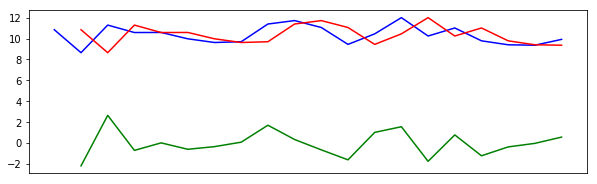

In [60]:
fig, ax = plt.subplots(figsize=(10,3))
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red');
plt.plot(ts - ts_lagged, color = 'green')  
#plt.plot(ts.diff(), color = 'black') #equivalent to above
plt.xticks([], []); #suppressing xticks


### Rolling Window Functions

In [61]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-05-01,-0.100873,0.037221,1.151642
2016-05-02,-0.410405,-0.298346,0.697776
2016-05-03,-0.613038,-0.396875,-0.854146
2016-05-04,0.611023,0.232560,0.816350
2016-05-05,-0.012079,-0.167425,0.581457


In [62]:
r = df.rolling(window = 5) #smaller window mimics your time series can help reduce noise, 
#larger window sizes help when you don't care about peaks and dips in the time series
r

Rolling [window=5,center=False,axis=0]

In [63]:
print(df.iloc[0:5]['A'].mean()) #to verify
r.mean().head(n=7) 

-0.10507441141668146


,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,-0.105074,-0.118573,0.478616
2016-05-06,-0.407900,-0.202679,0.495369
2016-05-07,-0.413921,-0.205103,0.599935


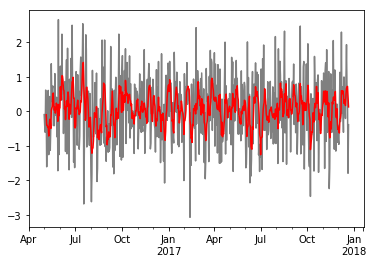

In [64]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red');

In [65]:
#expanding window
print(np.mean(df.iloc[0:2]['A']), np.mean(df.iloc[0:3]['A']), np.mean(df.iloc[0:4]['A']))
df.expanding(min_periods = 1).mean()[0:5]

-0.2556391313886323 -0.3747719708515258 -0.12832318500411938


,A,B,C
2016-05-01,-0.100873,0.037221,1.151642
2016-05-02,-0.255639,-0.130562,0.924709
2016-05-03,-0.374772,-0.219333,0.331758
2016-05-04,-0.128323,-0.106360,0.452906
2016-05-05,-0.105074,-0.118573,0.478616


** Pandas EWMA (Exponentially Weighted Moving Average)**  
- More recent points are interesting.

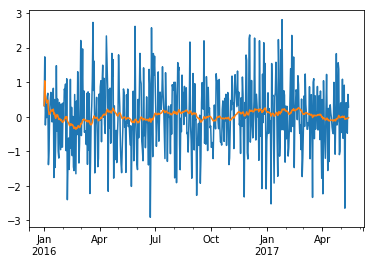

In [66]:
ts = pd.Series(np.random.randn(500), index = pd.date_range(start = '1/1/16', periods = 500, freq = 'D'))
ts.plot()
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot();
#ts.rolling(window = 60).mean().plot();

<a id='timeseries'></a>

# Trend and Seasonal Pattern in time series
[Back to top](#top)

- Air Passengers Dataset
        - Trend Spotting, Stationary Time Series, How to make the time series stationary ?, Auto Correlation, PACF

#### The classic Air Passengers Dataset 

In [67]:
df = pd.read_csv('data/AirPassengers.csv', parse_dates=['date'] ) 
df.columns=['#Passengers','Month']
df.set_index('Month',inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
df['1949']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


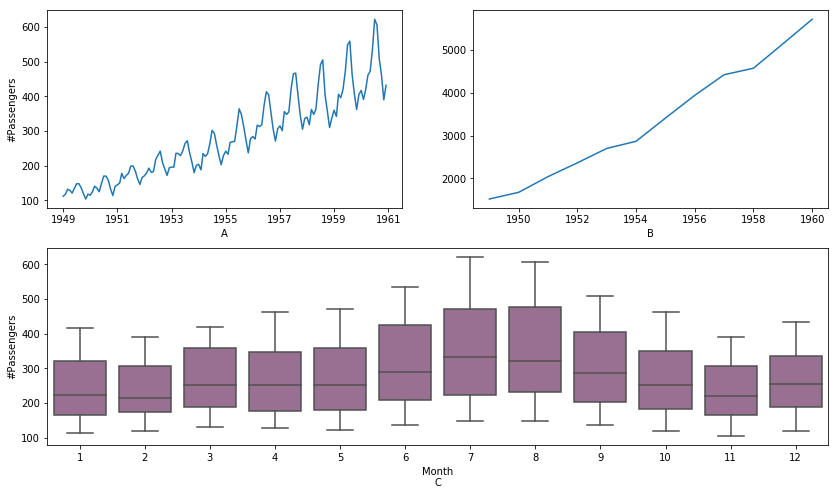

In [69]:
#Trend spotting
f, axs = plt.subplots(2,2,figsize=(14,8))

plt.subplot(221)
plt.plot(df)
plt.xlabel('A')
plt.ylabel("#Passengers")

plt.subplot(222)
plt.xlabel('B')
plt.plot(df.groupby([(df.index.year)]).sum())


plt.subplot(212)
sns.boxplot(df.index.month, df['#Passengers'], color="#A06995")
plt.xlabel("Month\nC");

(A) 
It is apparent that the number of passengers travelling on the airline is increasing with time, so there appears to be an increasing trend. There is also a clear cycle in the data which has a one-year period, i.e. there is clear seasonal variation in the data.

A time series plot is not only important for revealing patterns and features of the data but can also reveal potential outliers or erroneous values. For example, missing data are sometimes coded using a negative value – such values would obviously need to be handled differently in the analysis, and would certainly not want to be included as observations when fitting a model to data, such as the airline series, which can only take positive values.

(B) The yearly trend also shows that the #passengers have been increasing without fail.

(C) Seasonal boxplots of the data: An increasing trend is evident in the annual series , whilst the seasonal effects are clearly revealed in the boxplot, for which a tendency for more people to travel over the summer months of June to September can be seen.
The variance and the mean value in July and August is much higher than rest of the months.


Note: Seasonality is always of a fixed and known period. Hence, seasonal time series are sometimes called periodic time series. A cyclic pattern exists when data exhibit rises and falls that are not of fixed period


### Stationary Time Series 

A stationary time series is one whose statistical properties such as *mean, variance, autocorrelation*, etc. are all constant over time. Most statistical **forecasting** methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!  

E.g: If the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables. For this reason you should be cautious about trying to extrapolate regression models fitted to nonstationary data.


There are 2 main reasons behind non-stationarity of a TS:
1. *Trend* – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.

2. *Seasonality* – variations at specific time-frames. In Air passenger dataset, peak during summer months.

*Test Stationarity - Dicky Fuller Test*

- ARMA/ARIMA (Auto Regressive Integrated Moving Average) models works only when the time series is stationary. In other words, we need work on getting the time series stationary. 


<img src="data/Stationarytimeseries.png" ,style="width: 520px; height: 820px" ></img>
Source: https://www.otexts.org/fpp/8/1


**How to stationarize a time series ?  **
- (Detrend) Difference, log, moving average 
- (Remove Seasonality - Multiplier vs Additive effect in seasonality 
- 1 to 1 transformation - monotonic - so that you can go back to original series

<img src="data/loganddiff.png " ,style="width: 520px; height: 820px" ></img>
Source: https://www.otexts.org/fpp/8/1


### Augmented Dickey-Fuller Test

This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a test statistic and some critical values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 


### Autocorrelation

- Used to help identify possible structure of time series data. (Looking for periodicity - yearly,weekly etc)
- Gives a sense of how different points in time relate to each other in a way explained by temporal distance.

- Not a good idea if data is sampled at irregular intervals.
- Selfcorrelation or  in other words comparing the same series with itself at different lag values.


### Partial Auto correlation 
- Gives the partial correlation of a time series with its own lagged values, controlling for the values of time series at all shorter lags. (For lag 5, control 1-4 lags)



In [70]:
df.shape

(144, 1)

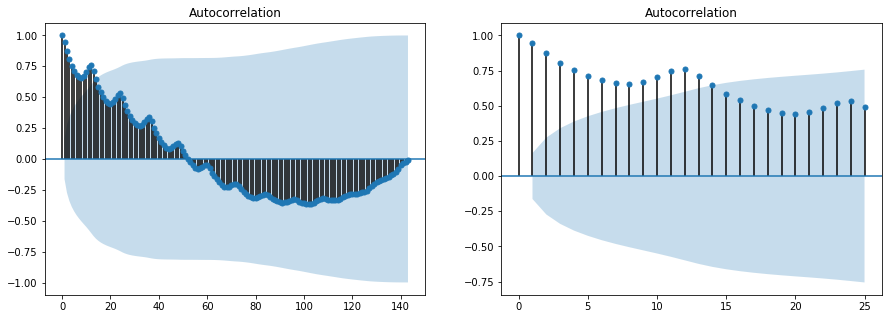

In [71]:
f, axs = plt.subplots(1,2,figsize=(15,5))

plot_acf(df['#Passengers'],ax=axs[0]); # 95% confidence interval
#plot_acf(df['#Passengers'],unbiased=True);  # Denominator changes 
plot_acf(df['#Passengers'],lags=25, ax=axs[1]); # Limit the number of lags - See the peaks at 12 months

Interpreting correlogram

-- The x-axis gives the lag (k) and the y-axis gives the autocorrelation $p_k$ at each lag, i.e. the correlogram is a plot of $p_k$ against k. Correlation is unitless, so there are no units for the y-axis.

-- The lag 0 autocorrelation is always 1 and is shown on the plot.

-- The significant autocorrelation at lag 1 month is probably due to the increasing trend over the period of the data. Usually a trend in the data will show in the correlogram as a slow decay in the autocorrelations, due to similar values in the series occurring close together in time. 

-- Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical noise/randomness.

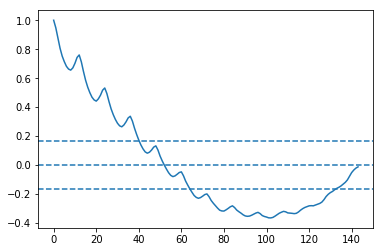

In [72]:
#Another way to plot Autocorrelation
acf_result = acf(df['#Passengers'],nlags=144) #Default nlags=40
plt.plot(acf_result);
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df['#Passengers'])),linestyle='--')

plt.axhline(y=1.96/np.sqrt(len(df['#Passengers'])),linestyle='--');

In [73]:
#Behind the scene (in brief)
x = np.array(df['#Passengers'])
print(acf(x, unbiased=True))
y1 = x[:144-2]  #Lag2 - Larger the lag, fewer data points
y2 = x[2:]
np.sum((y1-np.mean(x))*(y2-np.mean(x))) / ((len(x) - 2) * np.var(x))

[1.         0.95467704 0.88790688 0.82384458 0.774129   0.73944515
 0.71137419 0.69677541 0.69417581 0.71567822 0.75516171 0.80471118
 0.82952186 0.78338294 0.71594837 0.65405405 0.60519959 0.56664286
 0.53569601 0.51825101 0.51285925 0.53528635 0.56948699 0.61542385
 0.6386278  0.5977521  0.53416841 0.47704972 0.43203107 0.3944146
 0.36441703 0.34509264 0.33980156 0.35909103 0.39079178 0.43013344
 0.4493648  0.40822635 0.34502547 0.28889875 0.23839051]


0.8879068750566936

** Remove Trend ** (to make the time series stationary)

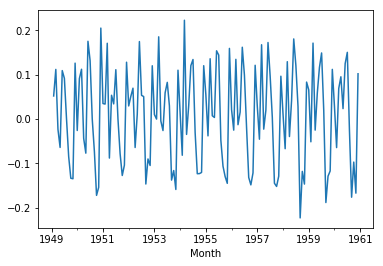

In [74]:
#De trend the data - by taking log and then difference
log_air_passengers = np.log(df['#Passengers'])
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift() #.diff()
log_air_passengers_diff.plot();
log_air_passengers_diff.dropna(inplace = True)

In [75]:
#Test stationarity
# http://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.stattools.adfuller.html
useful_values_raw = adfuller(log_air_passengers_diff, autolag = 'AIC', regression = 'c')[:5]
useful_values = [v for v in useful_values_raw[:4]]
useful_values.extend([useful_values_raw[4]['1%'], useful_values_raw[4]['5%'], useful_values_raw[4]['10%']])
pd.DataFrame({ 'Value':useful_values, 'Label':['Test Statistic','p-value','#Lags Used','Number of Observations Used', 'Critical value for 1%', 'Critical value for 5%', 'Critical value for 10%']})

,Label,Value
0,Test Statistic,-2.717131
1,p-value,0.071121
2,#Lags Used,14.000000
3,Number of Observations Used,128.000000
4,Critical value for 1%,-3.482501
5,Critical value for 5%,-2.884398
6,Critical value for 10%,-2.578960


Is Test Statistic less than critical value ? Is p-value low ? Stationarity is hard to achieve.

- Results aren't perfect - We didn't try to remove seasonality.

- The test statistic is smaller than the 10% critical values so we can say with 90% confidence that this is a stationary series.  Let's try Sunspots dataset !

# Sunspots dataset

In [76]:
#http://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.




The surface of the sun contains magnetic regions that appear as dark spots. These affect the propagation of radio waves and so telecommunication companies like to predict sunspot activity in order to plan for any future difficulties. Sunspots follow a cycle of length between 9 and 14 years.

In [77]:
dta = sm.datasets.sunspots.load_pandas().data
dta.shape

(309, 2)

In [78]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


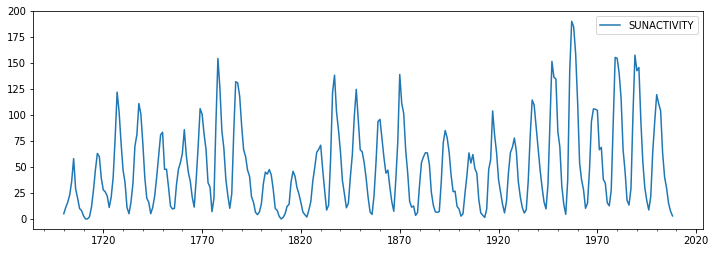

In [79]:
dta.plot(figsize=(12,4));

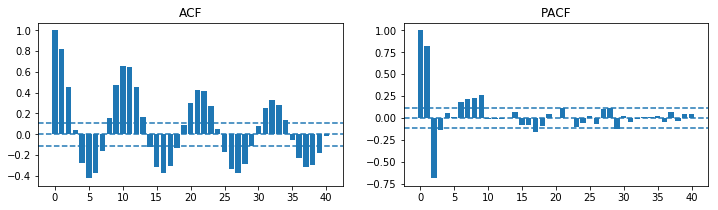

In [80]:
sun_act = dta.SUNACTIVITY
#fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

lag_acf = acf(sun_act)   
lag_pacf = pacf(sun_act)  

f, ax = plt.subplots(1, 2,figsize=(12, 3))
ax[0].bar(x = range(len(lag_acf)), height = lag_acf)
ax[0].axhline(y=0,linestyle='--')
ax[0].axhline(y=-1.96/np.sqrt(len(sun_act)),linestyle='--')
ax[0].axhline(y=1.96/np.sqrt(len(sun_act)),linestyle='--')
ax[0].set_title('ACF')
#The lag beyond which the ACF cuts off is the indicated number of MA terms.

ax[1].bar(x = range(len(lag_pacf)), height = lag_pacf)
ax[1].axhline(y=0,linestyle='--')
ax[1].axhline(y=-1.96/np.sqrt(len(sun_act)),linestyle='--')
ax[1].axhline(y=1.96/np.sqrt(len(sun_act)),linestyle='--');
ax[1].set_title('PACF');
#The lag beyond which the PACF cuts off is the indicated number of AR terms. (p)

In [81]:
useful_values_raw = adfuller(dta.SUNACTIVITY)[:5] 
useful_values = [v for v in useful_values_raw[:4]]
useful_values.extend([useful_values_raw[4]['1%'], useful_values_raw[4]['5%'], useful_values_raw[4]['10%']])
pd.DataFrame({ 'Value':useful_values, 'Label':['Test Statistic','p-value','#Lags Used','Number of Observations Used', 'Critical value for 1%', 'Critical value for 5%', 'Critical value for 10%']})

,Label,Value
0,Test Statistic,-2.837781
1,p-value,0.053076
2,#Lags Used,8.000000
3,Number of Observations Used,300.000000
4,Critical value for 1%,-3.452337
5,Critical value for 5%,-2.871223
6,Critical value for 10%,-2.571929


** Forecasting with ARIMA**

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary. 

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


** Parameters for ARIMA model **

(p, d, q)
1. The number of Auto-Regressive Terms (p) 
2. The number of differences taken (d)
3. The number of Moving Average Terms (q)

E.g:  ARIMA (1,0,0) is AR(1), ARIMA(0,1,0) is I(1), and ARIMA(0,0,1) is MA(1)

- Use PACF for AR model diagnostics (p)
- Use ACF for MA model diagostics (q)

Identifying the number of AR & MA terms - https://people.duke.edu/~rnau/arimrule.htm

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(3, 3)   Log Likelihood               -1279.848
Method:                       css-mle   S.D. of innovations             15.131
Date:                Sat, 29 Sep 2018   AIC                           2575.696
Time:                        06:11:46   BIC                           2605.562
Sample:                    12-31-1700   HQIC                          2587.636
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.8660      5.884      8.305      0.000      37.334      60.398
ar.L1.SUNACTIVITY     2.5461      0.034     75.794      0.000       2.480       2.612
ar.L2.SUNACTIVITY    -2.

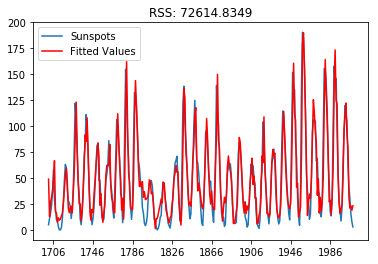

In [82]:
#Creating a model with p,d,q = 2,0,2
model = ARIMA(sun_act, order=(3,0,3), freq='A')  #2,0,2  #4,0,4 #3,0,3 #2,1,2
results_ARIMA = model.fit(disp=-1)  
plt.plot(sun_act,label='Sunspots')
plt.plot(results_ARIMA.fittedvalues, color='red',label='Fitted Values')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-sun_act)**2));
plt.legend()
print(results_ARIMA.summary())

#Note: Lookup auto.arima in R

In [83]:
#http://www.statisticshowto.com/durbin-watson-test-coefficient/
sm.stats.durbin_watson(results_ARIMA.resid.values)

1.9494088436138517

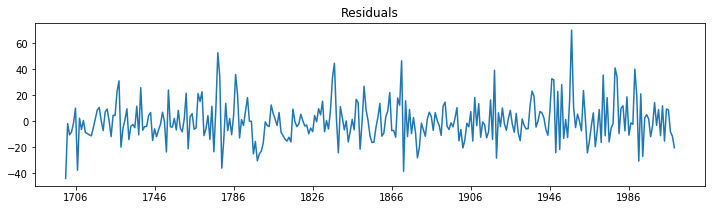

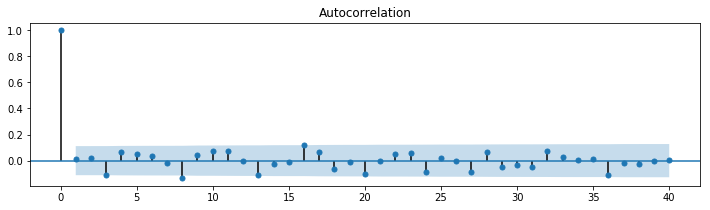

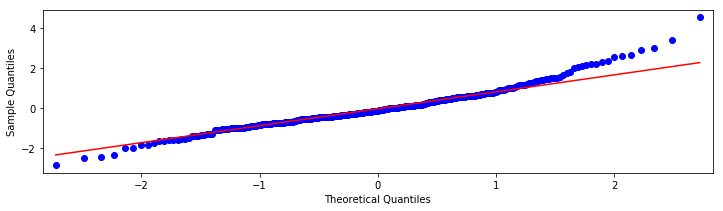

In [84]:
f, ax = plt.subplots(figsize=(12, 3))
ax.plot(results_ARIMA.resid);
ax.set_title('Residuals')

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(results_ARIMA.resid.values.squeeze(), lags=40, ax=ax)

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
fig = qqplot(results_ARIMA.resid, line='q', ax=ax, fit=True)


In [85]:
dta.tail()

,SUNACTIVITY
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5
2008-12-31,2.9


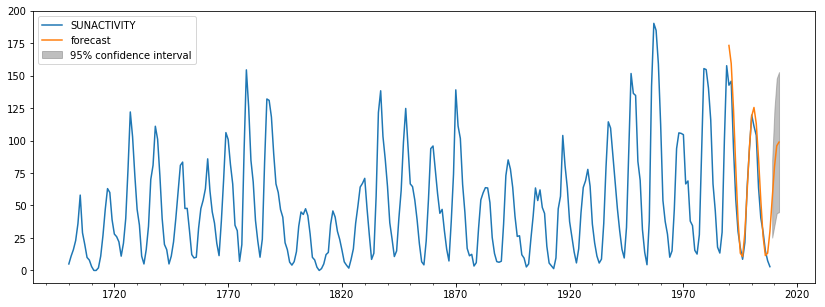

In [86]:
fig, ax = plt.subplots(figsize=(14, 5))
ax = sun_act.plot(ax=ax)
fig = results_ARIMA.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)


In [87]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
predict_sunspots = results_ARIMA.predict('1990', '2012', dynamic=True)
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)

-10.267095557451839

### Ljung-Box statistic

#### Ljung-Box statistic on the ARIMA model residuals

Ljung-Box test is used to check that the residuals from a time series model resemble white noise. 

[From Wikipedia](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test)

Ljung-Box test statistics hypothesis:  

$H_0 : \text{The residuals have no autocorrelation (i.e. are independently distributed) } $   
$H_A : \text{The residuals are autocorrelated } $
  
  
The test statistic is:

$$ Q = n\left(n+2\right)\sum_{k=1}^h\frac{\hat{\rho}^2_k}{n-k} $$

where n is the sample size, $ \hat{\rho}_k $ is the sample autocorrelation at lag $k$, and $h$ is the number of lags being tested.   

Under $ H_0$ the statistic $Q$ follows a   $\chi _{{(h)}}^{2}$ . For significance level $\alpha$ , the critical region for rejection of the hypothesis of randomness is:

$$ Q > \chi_{1-\alpha,h}^2 $$


In [88]:
r,q,p = sm.tsa.acf(results_ARIMA.resid.values.squeeze(), nlags=15, qstat=True)

data = np.c_[range(1,16), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.009128   0.026000  0.871901
2.0   0.020317   0.155216  0.925327
3.0  -0.108073   3.823270  0.281191
4.0   0.065248   5.164676  0.270814
5.0   0.048993   5.923441  0.313740
6.0   0.038359   6.390103  0.380937
7.0  -0.021621   6.538850  0.478417
8.0  -0.135978  12.442118  0.132541
9.0   0.046140  13.124065  0.157072
10.0  0.072942  14.834081  0.138229
11.0  0.072910  16.548350  0.121963
12.0 -0.001446  16.549027  0.167363
13.0 -0.108488  20.370135  0.086358
14.0 -0.029225  20.648369  0.110989
15.0 -0.012022  20.695608  0.146840


In [89]:
q, p = sm.stats.diagnostic.acorr_ljungbox(results_ARIMA.resid,15)
data = np.c_[range(1,16), q, p]
table = pd.DataFrame(data, columns=['lag', "Q", "Prob(>Q)"])
print(table.set_index('lag'))

              Q  Prob(>Q)
lag                      
1.0    0.026000  0.871901
2.0    0.155216  0.925327
3.0    3.823270  0.281191
4.0    5.164676  0.270814
5.0    5.923441  0.313740
6.0    6.390103  0.380937
7.0    6.538850  0.478417
8.0   12.442118  0.132541
9.0   13.124065  0.157072
10.0  14.834081  0.138229
11.0  16.548350  0.121963
12.0  16.549027  0.167363
13.0  20.370135  0.086358
14.0  20.648369  0.110989
15.0  20.695608  0.146840


### Conclusion
The residuals of the ARMA(3,3) model chosen show no autocorrelation - suggesting that this is an appropriate model fit for the data.

------

### Some examples of ACF and PACF plots for different ARMA processes generated with artificial data


### Source of neat "series over ACF & PACF plot" function `tsplot`
[Tom Augspurger](https://tomaugspurger.github.io/modern-7-timeseries.html)


In [90]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_process import arma_generate_sample
sns.set(style='ticks', context='talk')

def tsplot(y, lags=None, figsize=(10, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    #[ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [91]:
#(arparams[:2]) , maparams[:3]

In [92]:
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.arma_generate_sample.html
arparams = np.r_[1, -np.array([.75, -.25])]  
maparams = np.r_[1, np.array([.65, .25, .10])]

## try to see the differences in the ACF and PACF plots of various processes
y = arma_generate_sample(arparams, maparams, 500)  #ARMA(2,3)
#y = arma_generate_sample(arparams, maparams[:3], 500) #ARMA(2,2)
#y = arma_generate_sample(arparams[:2], maparams[:3], 500) #ARMA(1,2)
#y = arma_generate_sample(arparams[:2], maparams[:2], 500)
#y = arma_generate_sample(arparams[:2], maparams[:1], 500)
#y = arma_generate_sample(arparams[:1], maparams[:2], 500)
#y = arma_generate_sample(arparams[:1], maparams[:3], 500)

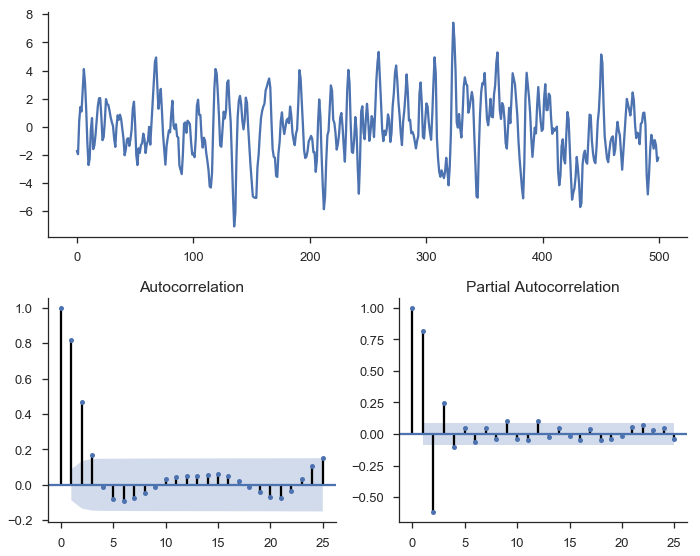

In [93]:
_ = tsplot(pd.Series(y), 25)

In [94]:
#R code to get AirPassengers.csv
#write.table(AirPassengers , file='tmp.csv', row.names = FALSE)
#df = read.csv('tmp.csv')
#df$date = as.Date(AirPassengers)
#write.csv(df,file='AirPassengers.csv', row.names = FALSE)

** References: **

https://github.com/ikding/pycon_time_series/blob/master/01.%20Dates%20%26%20Times.ipynb

https://www.youtube.com/watch?v=zmfe2RaX-14

Trend, Seasonal or cycles - https://www.otexts.org/fpp/6/1

https://people.duke.edu/~rnau/411diff.htm

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
 
Introductory Time Series with R - Paul S.P. Cowpertwait

https://www.youtube.com/watch?v=ckkiG-SDuV8


"An approximate answer to the right problem is worth a good deal more than an exact answer to an approximate problem." -- John Tukey

<a id='Linear-Regression-and-diagnostics'></a>

-----
Linear Regression and diagnostics
======

- Two ways to do Linear Regression - statsmodels and scikit learn

[back to top](#top)

In [95]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [96]:
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [97]:
boston.data[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [98]:
#Convert Bunch to Dataframe
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)
bostondf['MEDV'] = boston.target  #Target = MEDV = median value of owner-occupied homes in $1000's.
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [99]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(bostondf, alpha=0.3, figsize=(15, 15), diagonal='hist');
#scatter_matrix(bostondf[['MEDV', 'TAX', 'RM', 'CHAS']], alpha=0.3, figsize=(15, 15), diagonal='hist');

In [100]:
features = ['CRIM','ZN','INDUS','CHAS','RM', 'AGE', 'LSTAT', 'DIS', 'RAD','B','TAX', 'PTRATIO', 'NOX' ]
#features = ['CRIM' , 'CHAS', 'NOX', 'RM' , 'DIS', 'PTRATIO' , 'B' , 'LSTAT']

X = bostondf[features]
Y = bostondf['MEDV']

### Regression results

In [101]:
#This model doesn't include a constant coefficient.  But we can add one in using the add_constant method. (Y - intercept)
#X = sm.add_constant(X) 
#model = sm.OLS(Y,X)
#model = sm.OLS.from_formula( formula='MEDV ~ CRIM + ZN + INDUS + CHAS + RM + AGE + LSTAT + DIS + RAD + B + TAX + PTRATIO + NOX' , data = bostondf)

f = 'MEDV ~ CRIM + ZN +  CHAS + RM + LSTAT + DIS + RAD + B + TAX + PTRATIO + NOX + CRIM*RM '
model = sm.OLS.from_formula( formula=f , data = bostondf)
results = model.fit()
print(results.summary())

#http://www.theanalysisfactor.com/interpreting-interactions-in-regression/  

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sat, 29 Sep 2018   Prob (F-statistic):          1.26e-144
Time:                        06:13:54   Log-Likelihood:                -1478.1
No. Observations:                 506   AIC:                             2982.
Df Residuals:                     493   BIC:                             3037.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.0697      5.172      4.848      0.0

#### Interpreting above results

*Constant/Intercept*  - Estimated mean Y(average target MEDV) value when all X's(attributes) are 0. 

*$R^2$*  -  An $R^2$ of 1 indicates that the regression model perfectly fits the data. (Variability explained by the model)

*Adj. R-squared* - Takes into account when extra explantory variables added to the model. The adjusted $R^2$ increases only when the increase in $R^2$ (due to the inclusion of a new explanatory variable) is more than one would expect to see by chance. 

*p-values for coefficient* - p-value for INDUS and AGE are > 0.05, they are not statistically significant. 

*AIC* - Akaike Information Criterion (Based on the log-likelihood, the smaller the AIC value the better the model.)

*BIC* - Bayesian Information Criterion (The smaller the BIC value the better the model)

[From CS109A Labs (Public Github repo)]

*F-statistic* -  A value testing whether we're likely to see these results (or even stronger ones) if none of the predictors actually mattered.

*Prob (F-statistic)* - The probability that we'd see these results (or even stronger ones) if none of the predictors actually mattered. If this probability is small then either A) some combination of predictors actually matters or B) something rather unlikely has happened

*coef:* - The estimate of each beta. This has several sub-components:

    *std err:* - The amount we'd expect this value to wiggle if we re-did the data collection and re-ran our model. More data tends to make this wiggle smaller, but sometimes the collected data just isn't enough to pin down a particular value.
    
    *t and P>|t|:* - similar to the F-statistic, these measure the probability of seeing coefficients this big (or even bigger) if the given variable didn't actually matter. Small probability doesn't necessarily mean the value matters
    
    *[0.025 0.975]:* - Endpoints of the 95% confidence interval. This is a interval drawn in a clever way and which gives an idea of where the true beta value might plausibly live.

How do we use the model to predict housing prices? What is the equation? 

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * CRIM + \hat{\beta}_2 * ZN + \hat{\beta}_3 * INDUS  +  \hat{\beta}_4 * CHAS + ... $$ 

or you can use `results.predict`  

### Residual Sum of Square (RSS)
$$ RSS =  \sum_{i=1}^n (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i + ...  \hat{\beta}_p x_p))^2 $$

In [102]:
# We can calculate the residuals from the Y values and the fitted values (predictions)
residuals = bostondf.MEDV - results.predict(X)
print("RSS : ", np.sum(residuals**2))

# But they are already part of the results of statsmodel's OLS, as are the diagnostic results
print("RSS : ", np.sum(results.resid**2))
print("MSE : ", np.mean(results.resid**2))  #Mean squared error
results.rsquared


RSS :  10210.23102606287
RSS :  10210.23102606287
MSE :  20.178322185895


0.7609757370843357

### OLS using matrix math

$$ \hat{\beta} = {(X^T X)}^{-1} X^T y    $$  

In [103]:
tmp_Y = bostondf['MEDV']
tmp_X = bostondf[['CRIM' , 'ZN' ,  'CHAS' , 'RM' , 'LSTAT' , 'DIS' , 'RAD' , 'B' , 'TAX' , 'PTRATIO' , 'NOX' ]]
tmp_X = tmp_X.assign(const = 1)
tmp_X = tmp_X.assign(crim_rm = tmp_X.CRIM * tmp_X.RM)

In [104]:
W_e = np.dot(np.dot(np.linalg.inv(np.dot(tmp_X.T,tmp_X)), tmp_X.T),tmp_Y)
print(W_e)

f = 'MEDV ~ CRIM + ZN +  CHAS + RM + LSTAT + DIS + RAD + B + TAX + PTRATIO + NOX + CRIM*RM'
model = sm.OLS.from_formula( formula=f , data = bostondf)
results = model.fit()
print(results.summary()) 

[ 1.18269541e+00  3.54932982e-02  2.78687235e+00  4.92233716e+00
 -5.36220686e-01 -1.33866986e+00  2.45716427e-01  9.78304324e-03
 -9.69819803e-03 -8.51353161e-01 -1.45515374e+01  2.50697322e+01
 -2.13837115e-01]
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sat, 29 Sep 2018   Prob (F-statistic):          1.26e-144
Time:                        06:15:33   Log-Likelihood:                -1478.1
No. Observations:                 506   AIC:                             2982.
Df Residuals:                     493   BIC:                             3037.
Df Model:                          12                                         
Covariance Type:            nonrobust                                       

# Diagnostics
## Check if residuals are normally distributed     
### Histogram of residuals


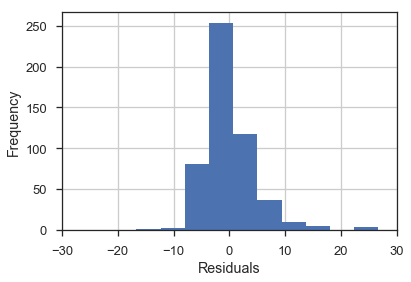

In [105]:
#Check if residuals are normally distributed
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-30,30)
plt.grid(True)
plt.hist(results.resid)
plt.show()

### QQ plot to check Normality
For verifying the Normality assumption, we can produce a QQplot of the sample quantiles against the theoretical quantiles from a normal distribution. We should see that in the core part of the plot, relationship is tight with the theoretical quantiles.

In the plot below, the blue dots line up along the red line. While some dots diverge at the high part of the quantile plot, this is OK since it represents an extreme in the distribution. We can conclude that the Normality assumption is valid.

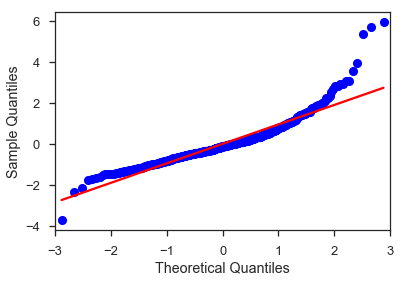

In [106]:
fig = sm.qqplot(results.resid, fit=True, line='r')
plt.show()

### [Residuals vs Fitted plot](https://onlinecourses.science.psu.edu/stat501/node/36)

- The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
- The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
- No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers.

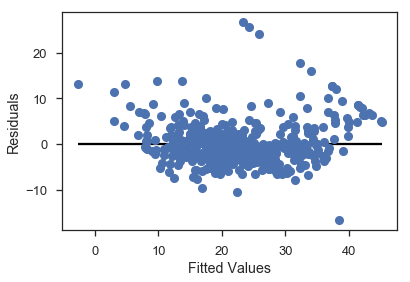

In [107]:
plt.plot(results.fittedvalues,  results.resid,'o')
plt.hlines(xmin=np.min(results.fittedvalues),xmax=np.max(results.fittedvalues),y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Leverage plot
A leverage plot can help to show data points that influence the residuals.

$$ h_{ii} = \frac{1}{n} + \frac{(x_i-\bar{\bar{x}})^2}{\sum_{j=1}^n (x_j-\bar{\bar{x}})^2} $$

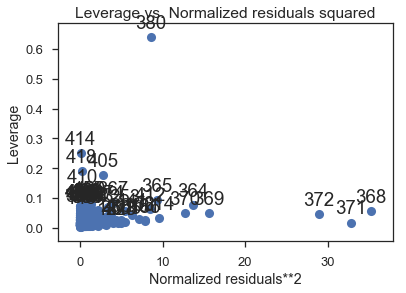

In [108]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(results)
plt.show()

- An outlier is a data point whose response y does not follow the general trend of the rest of the data. [368, 371, 372 - in the above plot]

- A data point has high leverage if it has "extreme" predictor x values. [380]

In [109]:
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [110]:
bostondf.iloc[[380,368,372,371]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.97620,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0


### Influence plot  
A data point is influential if it unduly influences any part of a regression analysis, such as the predicted responses, the estimated slope coefficients, or the hypothesis test results. Outliers and high leverage data points have the potential to be influential, but we generally have to investigate further to determine whether or not they are actually influential.

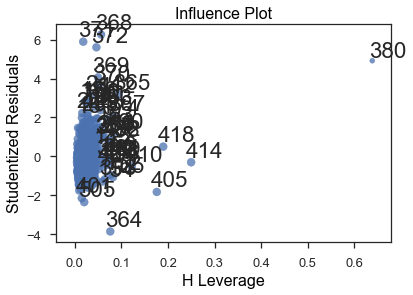

In [111]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(results,size = 5)
plt.show()

### Cook's distance plot

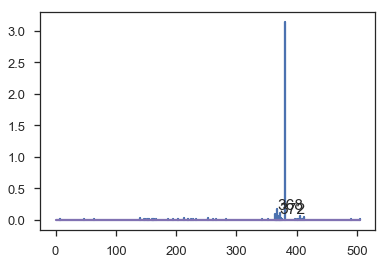

In [112]:
# Cooks distance -  is also used estimate of the influence of a data point
influence = results.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.annotate("368",(368,c[368]))
plt.annotate("372",(372,c[372]))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()

**Regression with Scikit Learn **

In [113]:
lm = LinearRegression()

features = ['CRIM','ZN','INDUS','CHAS','RM', 'AGE', 'LSTAT', 'DIS', 'RAD','B','TAX', 'PTRATIO', 'NOX' ]
X = bostondf[features]
Y = bostondf['MEDV']

lmfit = lm.fit(X, Y)

print ('Estimated intercept coefficient:', lm.intercept_)
print ('Adjusted R^2 of the regression:',  lm.score(X, Y))
print ('Estimated intercept coefficient:', lm.coef_)

Estimated intercept coefficient: 36.49110328036138
Adjusted R^2 of the regression: 0.7406077428649428
Estimated intercept coefficient: [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
  3.80475246e+00  7.51061703e-04 -5.25466633e-01 -1.47575880e+00
  3.05655038e-01  9.39251272e-03 -1.23293463e-02 -9.53463555e-01
 -1.77957587e+01]


In [114]:
residuals = Y - lmfit.predict(X)
print("RSS : ", np.sum(residuals**2))
print("MSE : ", np.mean(residuals**2))
#Residuals are almost same as statsmodel.OLS

RSS :  11080.276284149873
MSE :  21.897779217687496


#### [Feature Selection with Scikit Learn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)

In [115]:
from sklearn.feature_selection import RFE  #Recursive(Backward) feature selection, takes all features and prunes out recursively.
rfe = RFE(estimator=lm, n_features_to_select=5, step=1)
rfe.fit(X, Y)
best_features = np.where(rfe.get_support())[0]
[features[i] for i in best_features]

['CHAS', 'RM', 'DIS', 'PTRATIO', 'NOX']

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

skb = SelectKBest(f_regression, k=5)
skb.fit(X, Y)
best_features = np.where(skb.get_support())[0]
[features[i] for i in best_features]

['INDUS', 'RM', 'LSTAT', 'TAX', 'PTRATIO']

#### AIC, BIC and Adjusted R^2

In [117]:
#We will consider various combinations of these variables to evaluate multiple models. 
Xvar_cross = ['INDUS', 'RM',  'TAX', 'PTRATIO' ,'LSTAT',  'NOX']
#We will generate 6C1 + 6C2 + 6C3 + 6C4 + 6C5 + 6C6 = 63 models

In [118]:
fit = []
model = []

for L in range(1, len(Xvar_cross)+1):    #Number of predictors in each model
    for regressors in itertools.combinations(Xvar_cross, L):  #Generating combinations
        model.append(list(regressors))
        X = sm.add_constant(bostondf[list(regressors)])
        res = sm.OLS(Y,X).fit()
        fit.append(res)
        
olsresults = []
for l in fit: 
    olsresults.append([l.aic, l.bic,  l.rsquared_adj ])

print (np.array(olsresults).shape)

(63, 3)


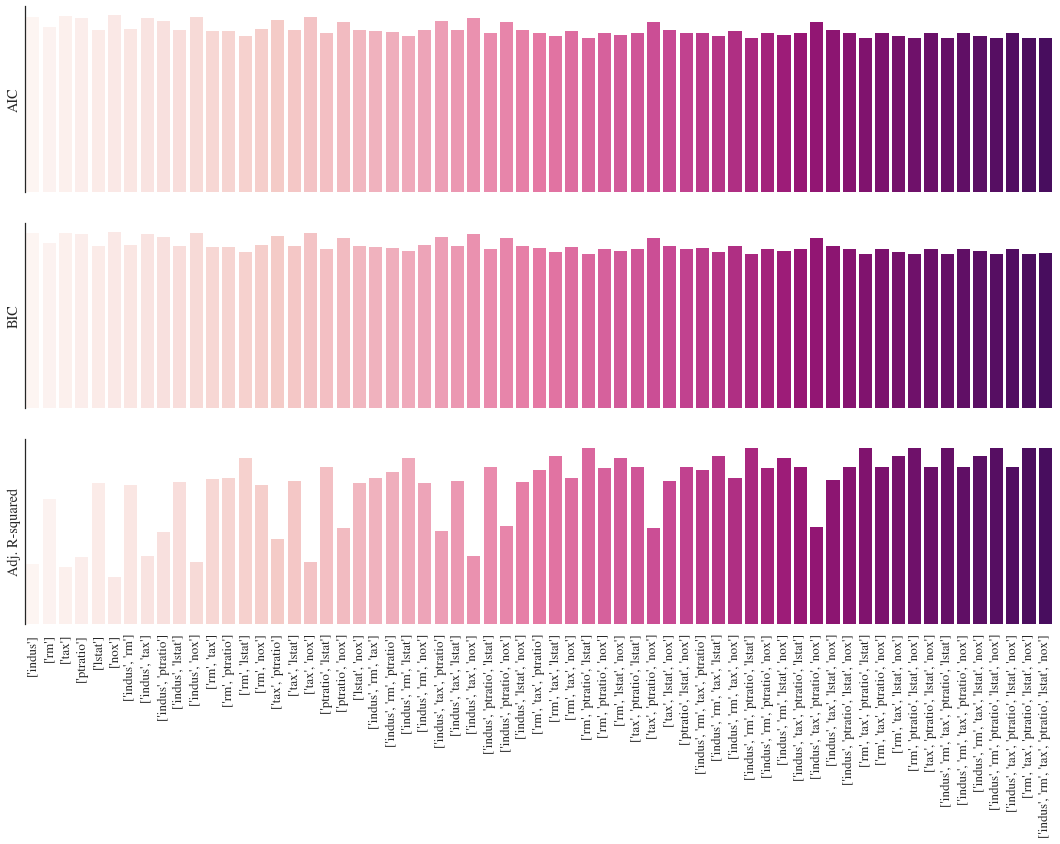

In [119]:
sns.set(style="white", font='StixGeneral', context="talk")
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
models = np.array(model)
mod = np.arange(len(models))

sns.barplot(mod,np.array(olsresults)[:,0], ci=None, palette="RdPu",  ax=ax1)
ax1.set_ylabel('AIC'); ax1.set_xlabel(''); 
sns.barplot(mod,np.array(olsresults)[:,1], ci=None, palette="RdPu",  ax=ax2)
ax2.set_ylabel('BIC'); ax2.set_xlabel('')

sns.barplot(mod,np.array(olsresults)[:,2], ci=None, palette="RdPu",  ax=ax3)
ax3.set_ylabel('Adj. R-squared'); ax3.set_xlabel('')
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[], xticklabels=[[j.lower() for j in i] for i in model])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tight_layout(h_pad=2)

In [120]:
print ("Minimum AIC: " , np.argmin(np.array(olsresults)[:,0]))
print ("Minimum BIC: " , np.argmin(np.array(olsresults)[:,1]))
print ("Maximum Adjusted R^2: " , np.argmax(np.array(olsresults)[:,2]))

Minimum AIC:  34
Minimum BIC:  34
Maximum Adjusted R^2:  56


In [121]:
print ("The model with the optimal criteria according to AIC and BIC: ", np.array(model)[34])
print ("The model with the optimal criteria according to Adj - R^2: ", np.array(model)[56])
#BIC statistic generally places a heavier penalty on models with many variables, 
#and hence results in the selection of smaller models
print("")

The model with the optimal criteria according to AIC and BIC:  ['RM', 'PTRATIO', 'LSTAT']
The model with the optimal criteria according to Adj - R^2:  ['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

